In [1]:
import nest
import pylab
import numpy
import nest.voltage_trace
from matplotlib import pyplot as plt

possible numeric stability problem in nest. follow up

In [30]:
MGN_params = {
        #'model': 'aeif_cond_exp',
        'E_L': -60.,  # resting membrane potential (mV) - see refs
        'C_m': 150.0,      # membrane capacity (pF)
        'g_L': 10.0,      # leak conductance  - see refs
        'V_reset': -55.,  # reset membrane potential after a spike (mV)  - for burstiness
        'V_th': -50.,  # spike threshold (mV)
        'tau_syn_ex': 2.5, # exc. synaptic time constant  - mit paper
        'tau_syn_in': 10., # exc. synaptic time constant  - mit paper

        "a": 40.,
        "b": 0.,
        'tau_w': 150.,
        'V_m': -60.,
}

TRN_params = {
        #'model': 'aeif_cond_exp',
        'E_L': -60.,  # resting membrane potential (mV) - see refs
        'C_m': 150.0,      # membrane capacity (pF)
        'g_L': 10.0,      # leak conductance  - see refs
        'V_reset': -55.,  # reset membrane potential after a spike (mV)  - for burstiness
        'V_th': -50.,  # spike threshold (mV)
        'tau_syn_ex': 2.5, # exc. synaptic time constant  - mit paper
        'tau_syn_in': 10., # exc. synaptic time constant  - mit paper
        "a": 30.,
        "b": 80.,
        'tau_w': 300.,
        'V_m': -60.,
}   

# according to RS neuron parameters in Destexhe, A. (2009). https://doi.org/10.1007/s10827-009-0164-4
# with "strong adaptation"
neuron_exc_params_aone = {
        #'model': 'aeif_cond_exp',
        "a": 2.,
        "b": 5.,
        'tau_w': 150.,

        'C_m': 150.,
        'g_L': 10.,
        'V_reset': -60.,
        'V_th': -50.,
        'E_L': -70.,
        'V_m': -70.,
        'tau_syn_ex': 5.,
        'tau_syn_in': 10.,
}

# according to fast-spiking inh neuron parameters in Destexhe, A. (2009). https://doi.org/10.1007/s10827-009-0164-4
neuron_inh_params_aone = {
        #'model': 'aeif_cond_exp',
        "a": 2.,
        "b": 0.,            # no spike-based adaptation
        'tau_w': 600.,

        'C_m': 150.,
        'g_L': 10.,
        'V_reset': -60.,
        'V_th': -50.,
        'E_L': -70.,  # this is changed
        'V_m': -70.,
        'tau_syn_ex': 5.,
        'tau_syn_in': 10.,
}

In [3]:
def oneSpikeEpsp (params, weight, vm=-70):
    nest.ResetKernel()

    n = nest.Create("aeif_cond_exp", 1)
    #nest.SetStatus(n, neuron_params_thl)
    nest.SetStatus(n, params)
    
    #n.V_m = vm

    v = nest.Create("voltmeter")
    #mm = nest.Create('multimeter', 1, {'record_from': ['V_m']})
    #nest.SetStatus(mm, {'interval': 0.1})

    nest.Connect(v, n)

    sg = nest.Create('spike_generator')

    nest.SetStatus(sg, {'spike_times' : [.1]})

    nest.Connect(sg, n, syn_spec={'weight':weight})

    nest.Simulate(100)

    nest.voltage_trace.from_device(v)
    #plt.plot(v.events['V_m'][100:])
    
    #print(v.events['V_m'])
    #l = v.events['V_m']
    l = vm
    if weight > 0:
        m = max(v.events['V_m'])
    else:
        m = min(v.events['V_m'])
    
    diff = abs(m - l)
    
    print("EPSP: ", str(m), "   Deviation from E_L: ", str(diff))

EPSP:  -64.87495017747362    Deviation from E_L:  5.125049822526378


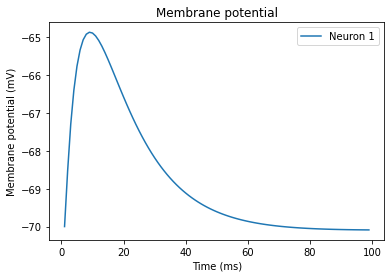

In [31]:
# from MGN to eA1
#oneSpikeEpsp(neuron_exc_params_aone, 0.05)
# oneSpikeEpsp(neuron_exc_params_aone, 180.)
oneSpikeEpsp(neuron_exc_params_aone, 4)

EPSP:  -64.87495017747362    Deviation from E_L:  5.125049822526378
EPSP:  -67.89025801338762    Deviation from E_L:  15.890258013387623


(None, None)

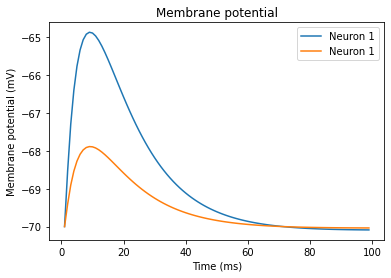

In [6]:
# from eA1 to eA1
oneSpikeEpsp(neuron_exc_params_aone, 4, -70), oneSpikeEpsp(neuron_exc_params_aone, 1.6, -52)

EPSP:  -79.22294942981542    Deviation from E_L:  9.222949429815415


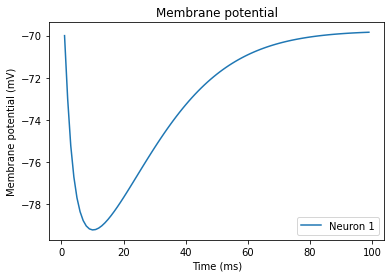

In [7]:
# from iA1 to eA1
oneSpikeEpsp(neuron_exc_params_aone, -40.)

EPSP:  -64.86983312350925    Deviation from E_L:  5.1301668764907475


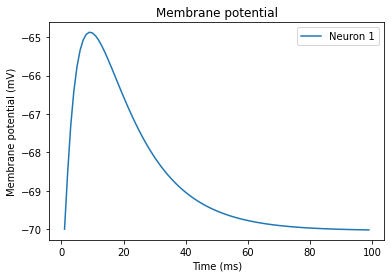

In [8]:
# from MGN to iA1
oneSpikeEpsp(neuron_inh_params_aone, 4)

EPSP:  -64.86983312350925    Deviation from E_L:  5.1301668764907475


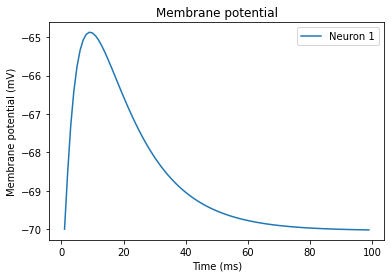

In [9]:
# from eA1 to iA1
oneSpikeEpsp(neuron_inh_params_aone, 4.)

EPSP:  -79.23257905419754    Deviation from E_L:  9.232579054197544


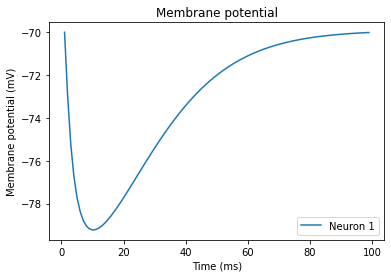

In [10]:
# from iA1 to iA1
oneSpikeEpsp(neuron_inh_params_aone, -40.)

EPSP:  -74.9779777623233    Deviation from E_L:  4.977977762323306


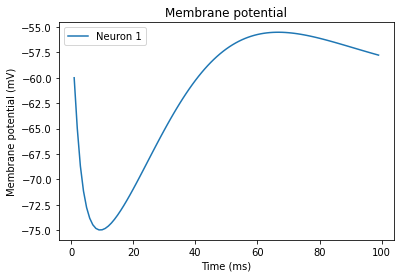

In [14]:
# from TRN to MGN
oneSpikeEpsp(MGN_params, -40.)

EPSP:  -57.30642412454566    Deviation from E_L:  2.693575875454343


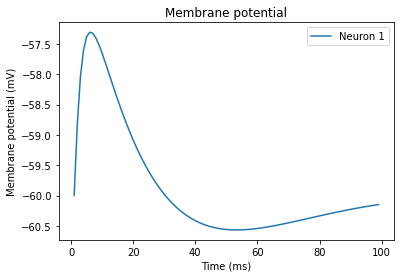

In [15]:
# from eA1 to MGN
oneSpikeEpsp(MGN_params, 4., -60)
# oneSpikeEpsp(MGN_params, 2.2*20)

EPSP:  -40.900585362566446    Deviation from E_L:  11.099414637433554


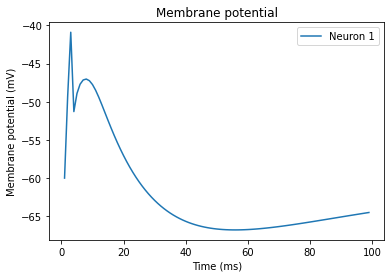

In [17]:
# from MGN to TRN
oneSpikeEpsp(TRN_params, 40, -52)

EPSP:  -59.94039862669038    Deviation from E_L:  0.05547386498507478


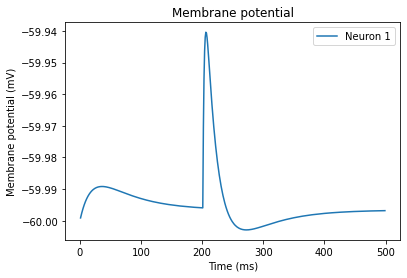

In [14]:
# from eA1 to TRN
oneSpikeEpsp(TRN_params, 0.08)

### Target of 1.0 mV

#### MGN

EPSP:  -58.97183992437671    Deviation from E_L:  1.0254730300658679


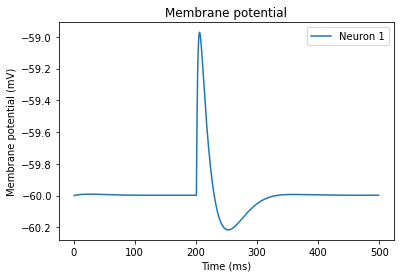

In [15]:
oneSpikeEpsp(MGN_params, 1.5)

#### TRN

EPSP:  -58.96319453608097    Deviation from E_L:  1.0326779555944867


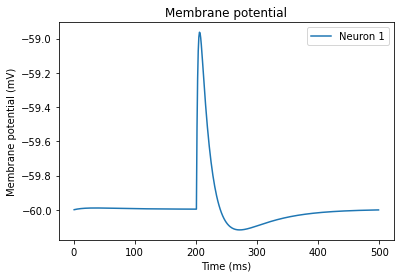

In [16]:
oneSpikeEpsp(TRN_params, 1.5)

#### iA1

EPSP:  -55.96442969962078    Deviation from E_L:  14.035483757339136


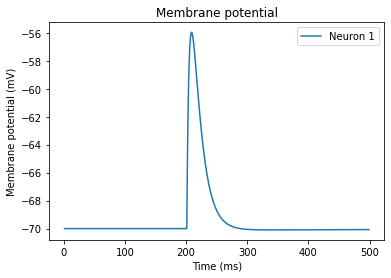

In [17]:
oneSpikeEpsp(neuron_inh_params_aone, 12.)

#### eA1

EPSP:  -55.97894481450389    Deviation from E_L:  14.020975517967472


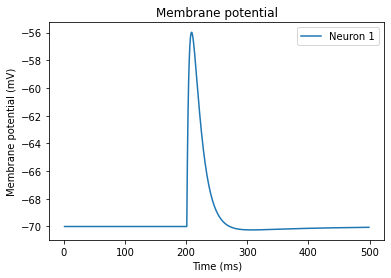

In [18]:
oneSpikeEpsp(neuron_exc_params_aone, 12.)

### Target of 0.5 mV

#### MGN

EPSP:  -59.75621030442368    Deviation from E_L:  0.2411026500188953


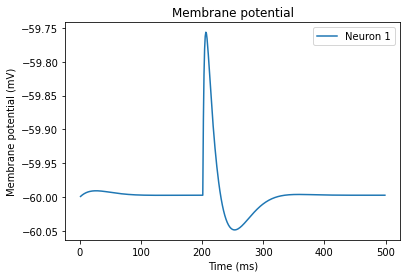

In [19]:
oneSpikeEpsp(MGN_params, .35)

#### TRN

EPSP:  -59.5114835020814    Deviation from E_L:  0.4843889895940592


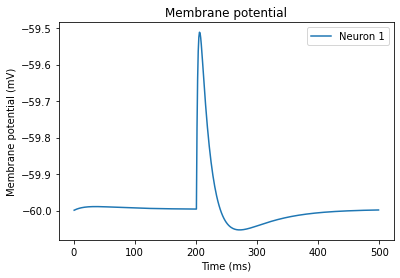

In [20]:
oneSpikeEpsp(TRN_params, .7)

#### iA1

EPSP:  -69.49072826441761    Deviation from E_L:  0.5091851925423043


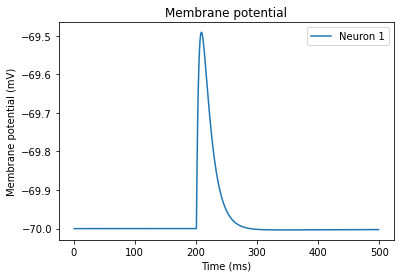

In [34]:
oneSpikeEpsp(neuron_inh_params_aone, .38)

#### eA1

EPSP:  -69.49125764451291    Deviation from E_L:  0.5086626879584486


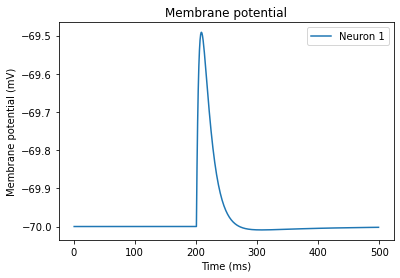

In [35]:
oneSpikeEpsp(neuron_exc_params_aone, 0.38)

EPSP:  -69.33160286574058    Deviation from E_L:  0.6683174667307838
EPSP:  -69.3309094949604    Deviation from E_L:  0.6690039619995218


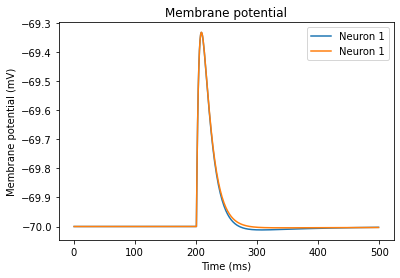

In [62]:
# from MGN to iA1
w = .5
oneSpikeEpsp(neuron_exc_params_aone, w), oneSpikeEpsp(neuron_inh_params_aone, w);